<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_111_emerging_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando fim
Si `pip install fim` no funciona, intente lo sugerido en https://borgelt.net/pyfim.html

A continuación el código para instalar en gogle colab.

In [5]:
%%script bash
curl -O https://borgelt.net/bin/py3/fim.so
sudo ln -sf "$(pwd)/fim.so" /usr/local/lib/python3.6/dist-packages/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  756k  100  756k    0     0  3859k      0 --:--:-- --:--:-- --:--:-- 3859k


In [1]:
baseurl="https://raw.githubusercontent.com/pcsilcan/dm/master/20202/data/"
filename="zoo.bin"

In [3]:
!curl -O "$baseurl$filename" 2>/dev/null

In [14]:
def loadDataset(filename):
    with open(filename, "r") as file:
        dataset = []
        dataset1 = []
        for x in file:
            if "#" in x: continue
            items = x.split()
            dataset.append([int(j) for j in items [1:]])
            if items[0] == '1':
                dataset1.append([int(j) for j in items [1:]])

    return dataset, dataset1

In [6]:
from fim import *

In [12]:
import matplotlib.pyplot as plt
import numpy as no
import seaborn as sns; sns.set()
import time
import pandas as pd

In [15]:
d, d1 = loadDataset(filename)

In [17]:
def emergingPattern(d, d1, minsupp, mingr):
    allitemsets = eclat(d, target='a', supp=-minsupp)
    if len(allitemsets) > 0:
        allitemsets1 = eclat(d1, target='a', supp=-minsupp)
        df = pd.DataFrame(allitemsets)
        df.columns = ["Pattern", "Freq"]
        df1 = pd.DataFrame(allitemsets1)
        df1.columns = ["Pattern", "Freq1"]
        emerging = df.join(df1.set_index('Pattern'), on='Pattern').fillna(0)
        emerging["Gr"] = ((len(d) - len(d1)) * emerging["Freq1"]) / \
                          (len(d1) * (emerging["Freq"] - emerging["Freq1"]))
        emerging = emerging[emerging.Gr >= mingr]
        jep = emerging[emerging.Freq == emerging.Freq1]
        
        return emerging, jep, True
    
    return _, _, False

In [25]:
def plotEmergingPatterns(v, em):
    numberData = []
    if v:
        for i in range(0, 61, 5):
            em_ = em[em.Gr >= i]
            numberData.append((i, len(em_), 0))
    df = pd.DataFrame(numberData)
    df.columns = ["Growth-rate", "#Itemsets", "TimeEmergingItemsets"]
    sns.lineplot(x="Growth-rate", y="#Itemsets", data=df)

    return df
    

,Growth-rate,#Itemsets,TimeEmergingItemsets
0,0,2315,0
1,5,1865,0
2,10,1669,0
3,15,1611,0
4,20,1581,0
5,25,1560,0
6,30,1540,0
7,35,1514,0
8,40,1482,0
9,45,1473,0


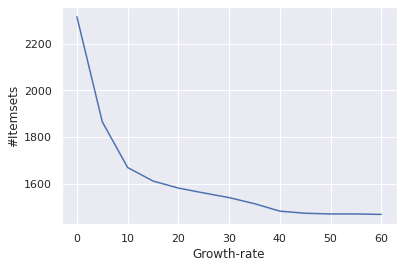

In [26]:
d, d1 = loadDataset(filename)
em, jep, ok = emergingPattern(d, d1, -1, 1)
plotEmergingPatterns(ok, em)

In [27]:
jep[:10]

,Pattern,Freq,Freq1,Gr
35921,"(20, 23, 18)",19,19.0,inf
40381,"(43, 23, 27, 16)",31,31.0,inf
40384,"(43, 23, 27, 28)",31,31.0,inf
40385,"(43, 23, 27)",31,31.0,inf
41109,"(43, 18, 23, 30)",26,26.0,inf
41113,"(43, 18, 23)",26,26.0,inf
49851,"(9, 25, 27, 28)",39,39.0,inf
49852,"(9, 25, 27)",39,39.0,inf
49853,"(9, 25, 28)",39,39.0,inf
49854,"(9, 25)",39,39.0,inf
